# Visual Impact

In [1]:
%matplotlib widget
import os
from pathlib import Path
import sys
sys.path.append(str(Path(os.getcwd()).parent.parent))
from src.utils import Photo, Turbine, pull_street_view_image, object_to_image, calc_angle_dist, is_in_frame, transform_coordinates, generate_visual_impact, adjust_image
# from utils import Photo, Turbine, pull_street_view_image, object_to_image, calc_angle_dist, is_in_frame, transform_coordinates, generate_visual_impact, adjust_image
import requests
import numpy as np
from io import BytesIO
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
from pyproj import Geod
from PIL import Image, ImageDraw, ImageEnhance

Defining function to pull images from the Google Street View API.

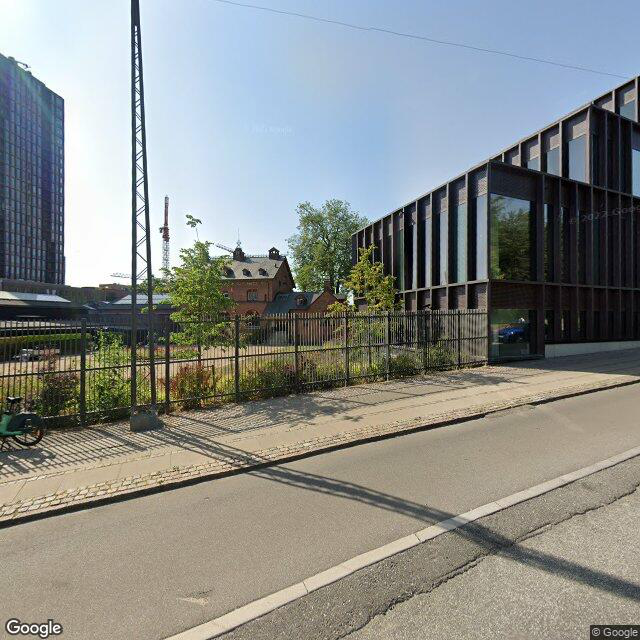

In [2]:
with open("../../assets/API.txt", 'r') as file:
    api_key = file.read().strip()

longitude = 12.5298105
latitude = 55.6675831


pull_street_view_image(api_key, longitude, latitude, fov = 90, heading = 180, pitch = 90, width = 400, height = 400)

Test function

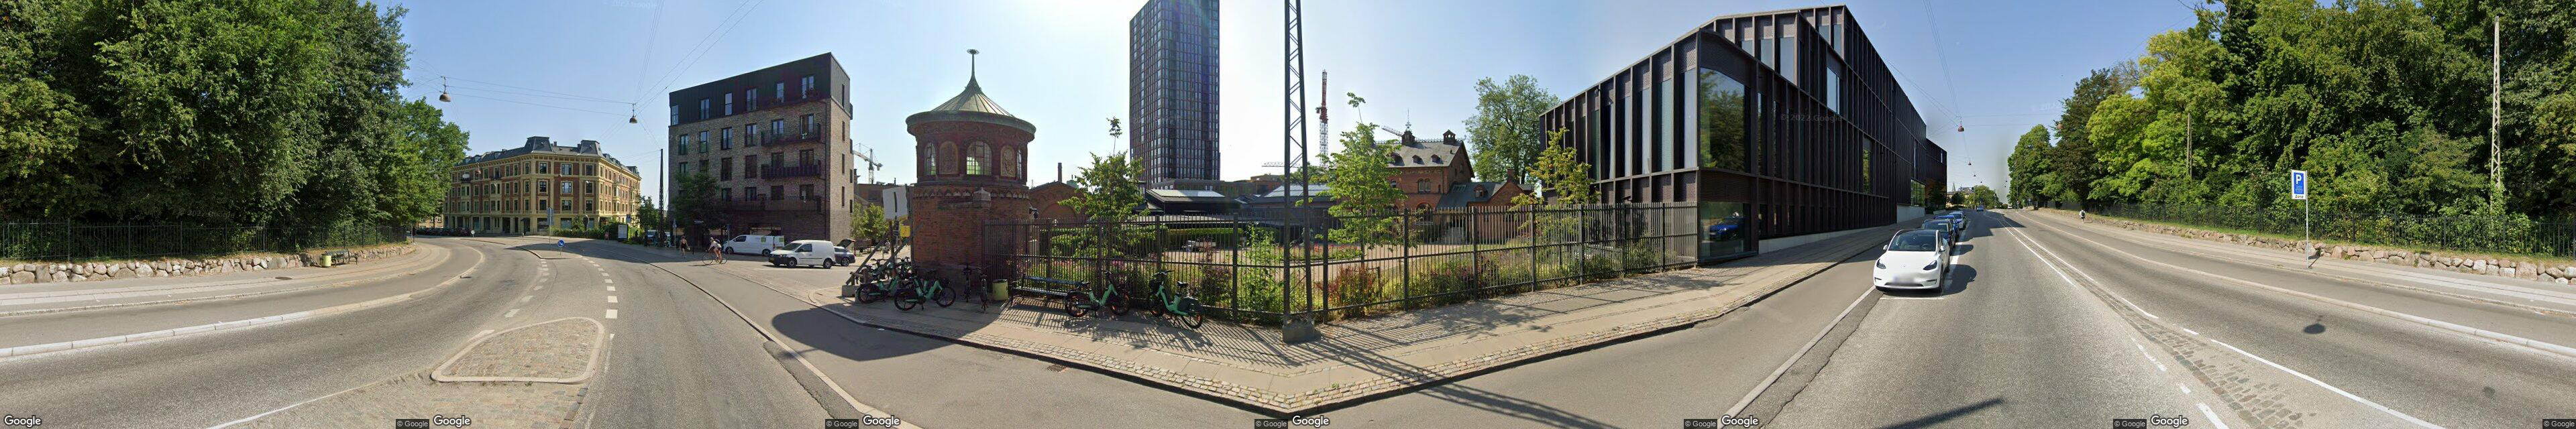

In [3]:
fov = 60
headings = np.arange(0, 360, fov)
image_list = []
for heading in headings:
    new_image = pull_street_view_image(api_key, longitude, latitude, heading=heading, fov = fov)
    
    # Append the new image to the list
    image_list.append(new_image)

# Calculate the total width needed for the final image
total_width = sum([img.width for img in image_list])
max_height = max([img.height for img in image_list])

# Create a blank canvas for the final image
final_image = Image.new('RGB', (total_width, max_height))

# Paste each image onto the final image
x_offset = 0
for img in image_list:
    final_image.paste(img, (x_offset, 0))
    x_offset += img.width

# Display or save the final image
display(final_image)

For later use: https://maps.googleapis.com/maps/api/streetview/metadata?size=600x300&location=eiffel%20tower,%20paris,%20france&heading=-45&pitch=42&fov=110&key=YOUR_API_KEY&signature=YOUR_SIGNATURE


[[308.69717287 441.78862348]
 [501.75916092 442.4916677 ]
 [311.44035665 198.85153341]
 [453.36743591 175.802287  ]]


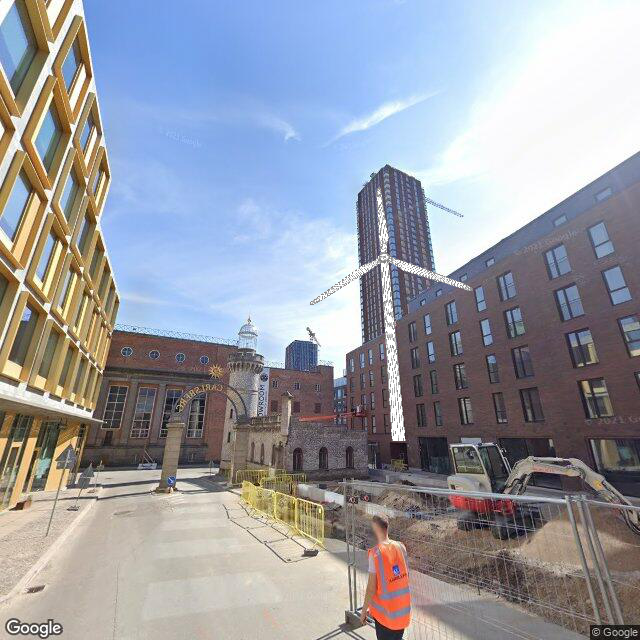

In [4]:
camera_coord = [12.5321515, 55.666176] # good coords
turbine_coord = [12.533636688214754, 55.66533363371845]

# # camera_coord = [12.1002813, 55.685392]
# # turbine_coord = [12.097003555173757, 55.68548628097172]

# camera_coord = [12.604266229232818, 55.655775191716536]
# turbine_coord = [12.607209939785848, 55.65801239597137]

camera_origin = transform_coordinates(camera_coord[0], camera_coord[1], input_crs_str = "EPSG:4326", output_crs_str = "EPSG:3035")[0,0]
turbine_origin = transform_coordinates(turbine_coord[0], turbine_coord[1], input_crs_str = "EPSG:4326", output_crs_str = "EPSG:3035")[0,0]

camera_elevation = 2
turbine_elevation = 0

camera_origin = np.append(camera_origin, camera_elevation)
turbine_origin = np.append(turbine_origin, turbine_elevation)

turbine_height = 120
roll, tilt, yaw = np.array([70, 0, 120]) # tilt should be 0
theta = np.array([np.deg2rad(roll), np.deg2rad(tilt), np.deg2rad(yaw)])

f = 1 # focal length
fov = [90, 90]

pull_street_view_image(api_key, camera_coord[0], camera_coord[1], fov = fov[0], heading = yaw, pitch = roll, width = 800, height = 800)

object_to_image("../../assets/windmill.obj", elevation = 0, azimuth = -90, view_height = camera_elevation, total_height = turbine_height, debug = False)

pic_class = Photo("../../temp/site_img.png", fov, theta, camera_coord, camera_origin, f)
turb_class = Turbine("../../temp/obj2png.png", fov, turbine_height, turbine_coord, turbine_origin, 0)

res_pic = generate_visual_impact(pic_class, turb_class, debug = False)

display(res_pic)